In [1]:
import Image_padder as ip
from docTR import docTr
import json
from PIL import Image
import torch
import torchvision
from torchvision.io import read_image
from torchvision.utils import draw_bounding_boxes
from fuzzywuzzy import fuzz
from sklearn.cluster import DBSCAN
import numpy as np

/opt/homebrew/anaconda3/envs/invoice/lib/python3.10/site-packages/weasyprint/text/fonts.py:65: UserWarning: No fonts configured in FontConfig. Expect ugly output.
  warn('No fonts configured in FontConfig. Expect ugly output.')
/opt/homebrew/anaconda3/envs/invoice/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/opt/homebrew/anaconda3/envs/invoice/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/opt/homebrew/anaconda3/envs/invoice/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this 

In [2]:
path='/Users/901002/work/Invoice/Main/TEST/Screenshot 2023-07-28 at 3.13.08 PM.png'
word_coordinates=docTr(ip.padder(path,100,100))

/opt/homebrew/anaconda3/envs/invoice/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [3]:
file_path='TEST/output_dictionary-2.json'
with open(file_path, "r") as file:
    data = json.load(file)

table_cell_coordinates=[]
lable=list()
tags=list()
for i, j in zip(data['polygons'],data['boxes']):
    xcoordinates=i[0::2]
    ycoordinates=i[1::2]
    table_cell_coordinates.append([min(xcoordinates),min(ycoordinates),max(xcoordinates),max(ycoordinates)])
    lable.append(j)
    tags.append(str(j))

table_cell_coordinates ,lable

([[290.9682922363281, 106.63185119628906, 338.39208984375, 127.28910064697266],
  [768.76123046875, 107.15618896484375, 833.5509643554688, 128.21591186523438],
  [1181.1759033203125,
   136.94723510742188,
   1284.1845703125,
   154.20516967773438],
  [1181.935791015625,
   171.28704833984375,
   1284.3018798828125,
   188.17393493652344],
  [1181.1630859375, 205.78756713867188, 1285.17333984375, 222.6939697265625],
  [578.1065063476562,
   135.71075439453125,
   702.3651733398438,
   156.1034698486328],
  [597.22314453125, 308.073974609375, 701.2300415039062, 327.7273254394531],
  [606.2940063476562, 342.3621826171875, 700.620361328125, 362.1129150390625],
  [1181.2130126953125,
   240.69393920898438,
   1283.8922119140625,
   257.677490234375],
  [1240.4246826171875,
   105.74646759033203,
   1283.2470703125,
   125.51065826416016],
  [596.1287231445312,
   273.9065856933594,
   701.6409301757812,
   293.87493896484375],
  [1191.8927001953125,
   309.25860595703125,
   1283.319946289

In [4]:
Image.open('temp/padded_img.png').convert("RGB").save('temp/padded_img.png')
img = read_image('temp/padded_img.png')
bbox = torch.tensor(table_cell_coordinates, dtype=torch.int)
image_out = torchvision.transforms.ToPILImage()(draw_bounding_boxes(img, bbox, width=2, colors=(255,0,0),fill =False,labels= tags,font_size=1500 ))
image_out.show()

/opt/homebrew/anaconda3/envs/invoice/lib/python3.10/site-packages/torchvision/utils.py:232: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")


In [5]:
headder=['Description', 'Type', 'Units', 'PerUnit', 'FxRate', 'Total']
headders=list()
for word in word_coordinates:
    best_similarity = 0
    best_match = None

    for header_word in headder:
        similarity = fuzz.partial_ratio(word[0], header_word)
        if similarity > best_similarity:
            best_similarity = similarity
            best_match = header_word

    # Check if the best match has sufficient similarity threshold
    if best_similarity >= 80 and len(headders)<=len(headder):  # You can adjust the threshold as needed
        headders.append(word)
headders = sorted(headders, key=lambda entry: entry[1][0])

In [6]:
for words in word_coordinates:
  if words[0] not in headder:
    print(words)

['Ocean Freight', [0.0, 136.013671875, 137.314453125, 159.498046875]]
['Per Container', [287.2265625, 136.9921875, 419.501953125, 155.0947265625]]
['0.198', [488.7890625, 136.5029296875, 549.2578125, 155.583984375]]
['USD3,359.75', [575.712890625, 136.013671875, 706.728515625, 158.0302734375]]
['USD 665.23', [1180.400390625, 136.5029296875, 1290.0, 155.583984375]]
['Bunker Surcharge', [1.259765625, 169.7724609375, 171.328125, 194.724609375]]
['Per Container', [288.486328125, 170.7509765625, 419.501953125, 189.3427734375]]
['0.198', [488.7890625, 170.7509765625, 547.998046875, 189.83203125]]
['USD540.25', [590.830078125, 169.7724609375, 709.248046875, 189.83203125]]
['USD 106.97', [1181.66015625, 170.7509765625, 1290.0, 189.3427734375]]
['Local Pickup & Delivery', [0.0, 203.53125, 220.458984375, 227.994140625]]
['PerCBM', [280.927734375, 202.552734375, 377.9296875, 226.5263671875]]
['10.56', [488.7890625, 204.9990234375, 549.2578125, 224.080078125]]
['CZK1,550.00', [574.453125, 203.5312

In [7]:


# Function to determine if two values are close based on a threshold
def is_close(value1, value2, threshold=3):
    return abs(value1 - value2) <= threshold

grouped_data = []
for entry in [data for data in word_coordinates if data[0] not in headder]:
    found_group = False

    for group in grouped_data:
        if is_close(group[0][1][1], entry[1][1], threshold=13):  # Adjust threshold as needed
            group.append(entry)
            found_group = True
            break

    if not found_group:
        grouped_data.append([entry])


row_data=[]
for group in grouped_data:
   dic=dict()
   for entry in group:
      min=1000000000000
      tag=None
      for header in headders:
          if abs(abs((entry[1][0]+entry[1][2])/2) - abs((header[1][0]+ header[1][2])/2))<min:
              min=abs(abs((entry[1][0]+entry[1][2])/2) - abs((header[1][0]+ header[1][2])/2))
              tag=header[0]
      dic[tag]=entry[0]
      print(entry[0],tag)
   print(dic)
   row_data.append(dic.copy())
   print()


Ocean Freight Description
Per Container Type
0.198 Units
USD3,359.75 PerUnit
USD 665.23 Total
{'Description': 'Ocean Freight', 'Type': 'Per Container', 'Units': '0.198', 'PerUnit': 'USD3,359.75', 'Total': 'USD 665.23'}

Bunker Surcharge Description
Per Container Type
0.198 Units
USD540.25 PerUnit
USD 106.97 Total
{'Description': 'Bunker Surcharge', 'Type': 'Per Container', 'Units': '0.198', 'PerUnit': 'USD540.25', 'Total': 'USD 106.97'}

Local Pickup & Delivery Description
PerCBM Type
10.56 Units
CZK1,550.00 PerUnit
0.05 FxRate
USD 818.40 Total
{'Description': 'Local Pickup & Delivery', 'Type': 'PerCBM', 'Units': '10.56', 'PerUnit': 'CZK1,550.00', 'FxRate': '0.05', 'Total': 'USD 818.40'}

Stuffing Charges Description
Per CBM Type
10.56 Units
CZK596.00 PerUnit
0.05 FxRate
USD. 314.69 Total
{'Description': 'Stuffing Charges', 'Type': 'Per CBM', 'Units': '10.56', 'PerUnit': 'CZK596.00', 'FxRate': '0.05', 'Total': 'USD. 314.69'}

Origin" Terminal Handling Fee Description
Per Container Type

In [8]:
import csv


filename = "test_output.csv"

with open(filename, mode='w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=[item[0] for item in headders])
    writer.writeheader()
    writer.writerows(row_data)

print("CSV file created successfully.")


CSV file created successfully.


In [9]:
[item[0] for item in headders]

['Description', 'Type', 'Units', 'PerUnit', 'FxRate', 'Total']

In [10]:
import Image_padder as ip
from docTR import docTr
from make_CSV import make_csv


path='/Users/901002/work/Invoice/Main/TEST/Screenshot 2023-07-28 at 3.13.08 PM.png'
word_coordinates=docTr(ip.padder(path,100,100),True)

make_csv(data=word_coordinates, headers_list=['Description', 'Type', 'Units', 'PerUnit', 'FxRate', 'Total'])

/opt/homebrew/anaconda3/envs/invoice/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/opt/homebrew/anaconda3/envs/invoice/lib/python3.10/site-packages/torchvision/utils.py:232: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")


'CSV file created successfully.'

1411 399


/opt/homebrew/anaconda3/envs/invoice/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/opt/homebrew/anaconda3/envs/invoice/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/opt/homebrew/anaconda3/envs/invoice/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, futur

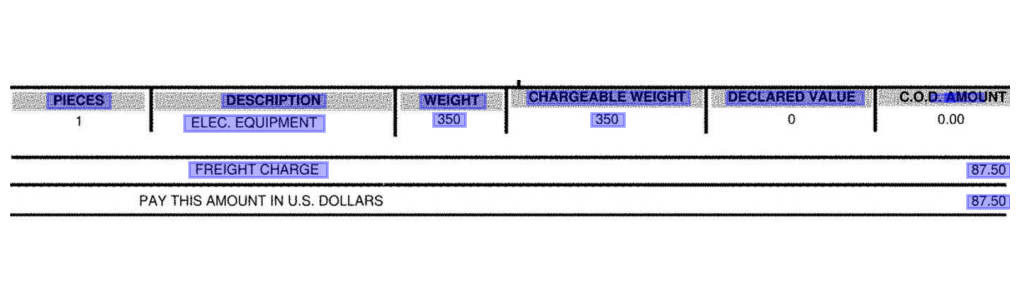

In [7]:
import json
from PIL import Image
import os
from doctr.models import ocr_predictor
from doctr.io import DocumentFile


image_path = "temp/padded_img.png"
word_count = 1
with Image.open(image_path) as img:
            width, height = img.size
print(width, height)
model = ocr_predictor(det_arch='db_resnet50', reco_arch='crnn_vgg16_bn', pretrained=True)

single_img_doc = DocumentFile.from_images(image_path)

result = model(single_img_doc)


result.show(single_img_doc)

json_data = result.export()
               

file_path = "word1.json"

with open(file_path, "w") as file:
    json.dump(json_data, file) 